***
  ## James T Anthraper
  
***

# RIO-125: HR Salary Dashboard - Train the Dataset and Predict Salary
***

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the csv file into Pandas Dataframe 
data=pd.read_csv("Salary Dataset.csv")
data

,Age,Workclass,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
data.head()

,Age,Workclass,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   Education       32561 non-null  object
 3   Education-num   32561 non-null  int64 
 4   Marital-status  32561 non-null  object
 5   Occupation      32561 non-null  object
 6   Relationship    32561 non-null  object
 7   Race            32561 non-null  object
 8   Sex             32561 non-null  object
 9   Capital-gain    32561 non-null  int64 
 10  Capital-loss    32561 non-null  int64 
 11  Hours-per-week  32561 non-null  int64 
 12  Native-country  32561 non-null  object
 13  Salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [5]:
data.describe()

,Age,Education-num,Capital-gain,Capital-loss,Hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [6]:
data.shape

(32561, 14)

In [7]:
data.isna().sum()

Age               0
Workclass         0
Education         0
Education-num     0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Native-country    0
Salary            0
dtype: int64

In [8]:
data['Education-num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [9]:
data['Education'].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

##  <u>Data Cleaning</u>

### Removing Unwanted Columns

In [10]:
data.columns

Index(['Age', 'Workclass', 'Education', 'Education-num', 'Marital-status',
       'Occupation', 'Relationship', 'Race', 'Sex', 'Capital-gain',
       'Capital-loss', 'Hours-per-week', 'Native-country', 'Salary'],
      dtype='object')

***
**The columns 'Education-num','Capital-loss','Capital-gain' has no significance in salary prediction so they are removed**
***

In [11]:
data=data.drop(columns=['Education-num','Capital-loss','Capital-gain'],axis=1)
data

,Age,Workclass,Education,Marital-status,Occupation,Relationship,Race,Sex,Hours-per-week,Native-country,Salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


### Checking for special characters in the dataset

In [12]:
data.isin(['?']).sum()

Age                  0
Workclass         1836
Education            0
Marital-status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Hours-per-week       0
Native-country     583
Salary               0
dtype: int64

***
**There is special character "?" are found in the Workclass, Occupation and Native-Country columns so they are removed**
***

In [13]:
data.loc[(data['Occupation'] == '?') | (data['Workclass'] == '?') | (data['Native-country'] == '?')]

,Age,Workclass,Education,Marital-status,Occupation,Relationship,Race,Sex,Hours-per-week,Native-country,Salary
14,40,Private,Assoc-voc,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,40,?,>50K
27,54,?,Some-college,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,60,South,>50K
38,31,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,38,?,>50K
51,18,Private,HS-grad,Never-married,Other-service,Own-child,White,Female,30,?,<=50K
61,32,?,7th-8th,Married-spouse-absent,?,Not-in-family,White,Male,40,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,Bachelors,Married-civ-spouse,?,Wife,White,Female,55,United-States,>50K
32531,30,?,Bachelors,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,99,United-States,<=50K
32539,71,?,Doctorate,Married-civ-spouse,?,Husband,White,Male,10,United-States,>50K
32541,41,?,HS-grad,Separated,?,Not-in-family,Black,Female,32,United-States,<=50K


In [14]:
data['Workclass'].value_counts()['?']

1836

In [15]:
data['Occupation'].value_counts()['?']

1843

In [16]:
data['Native-country'].value_counts()['?']

583

In [17]:
#Removing rows containing "?"
data.drop(data[data['Workclass'] == '?'].index, inplace = True)
data.drop(data[data['Occupation'] == '?'].index, inplace = True)
data.drop(data[data['Native-country'] == '?'].index, inplace = True)
data

,Age,Workclass,Education,Marital-status,Occupation,Relationship,Race,Sex,Hours-per-week,Native-country,Salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
32557,40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
32558,58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
32559,22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


In [18]:
data.isin(['?']).sum()

Age               0
Workclass         0
Education         0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours-per-week    0
Native-country    0
Salary            0
dtype: int64

In [19]:
data.head(20)

,Age,Workclass,Education,Marital-status,Occupation,Relationship,Race,Sex,Hours-per-week,Native-country,Salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
5,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
6,49,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K
8,31,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,>50K
9,42,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K


***
**After removing the rows some index vales are missing (like 14th index is missing) so the index values are resetted**
***

In [20]:
#Resetting the index values
data.reset_index(inplace = True,drop=True)
data.head(20)

,Age,Workclass,Education,Marital-status,Occupation,Relationship,Race,Sex,Hours-per-week,Native-country,Salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
5,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K
6,49,Private,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,>50K
8,31,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,>50K
9,42,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,>50K


## <u>Exploratory Data Analysis(EDA)</u>


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             30162 non-null  int64 
 1   Workclass       30162 non-null  object
 2   Education       30162 non-null  object
 3   Marital-status  30162 non-null  object
 4   Occupation      30162 non-null  object
 5   Relationship    30162 non-null  object
 6   Race            30162 non-null  object
 7   Sex             30162 non-null  object
 8   Hours-per-week  30162 non-null  int64 
 9   Native-country  30162 non-null  object
 10  Salary          30162 non-null  object
dtypes: int64(2), object(9)
memory usage: 2.5+ MB


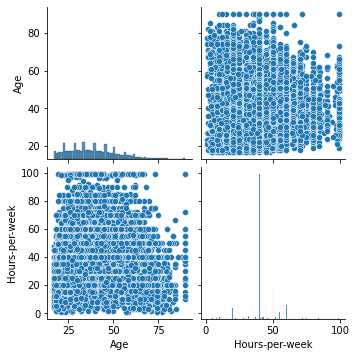

In [22]:
sns.pairplot(data)

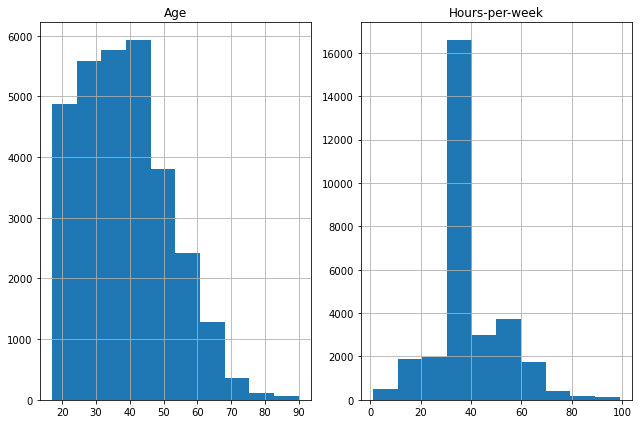

In [23]:
freqgraph=data.select_dtypes(include=['int64'])
freqgraph.hist(figsize=(9,6))
plt.tight_layout()
plt.show()

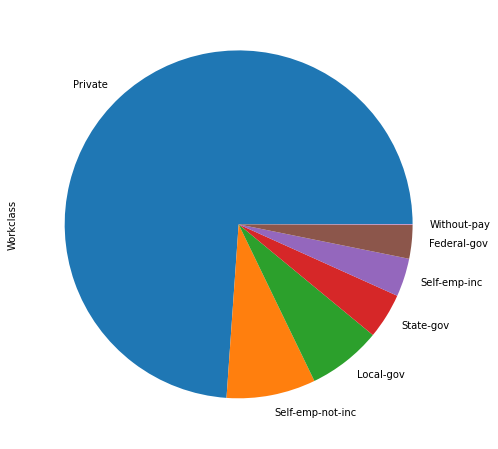

In [24]:
plt.figure(figsize=(10,8))
data['Workclass'].value_counts().plot(kind = 'pie')
plt.show()

<AxesSubplot:xlabel='Workclass', ylabel='count'>

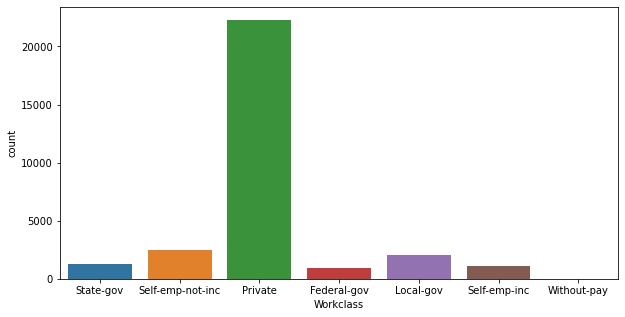

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(data['Workclass'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Bachelors'),
  Text(1, 0, 'HS-grad'),
  Text(2, 0, '11th'),
  Text(3, 0, 'Masters'),
  Text(4, 0, '9th'),
  Text(5, 0, 'Some-college'),
  Text(6, 0, 'Assoc-acdm'),
  Text(7, 0, '7th-8th'),
  Text(8, 0, 'Doctorate'),
  Text(9, 0, 'Assoc-voc'),
  Text(10, 0, 'Prof-school'),
  Text(11, 0, '5th-6th'),
  Text(12, 0, '10th'),
  Text(13, 0, 'Preschool'),
  Text(14, 0, '12th'),
  Text(15, 0, '1st-4th')])

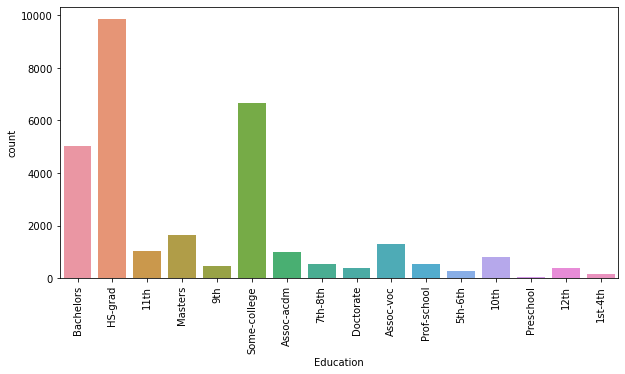

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(data['Education'])
plt.xticks(rotation=90)

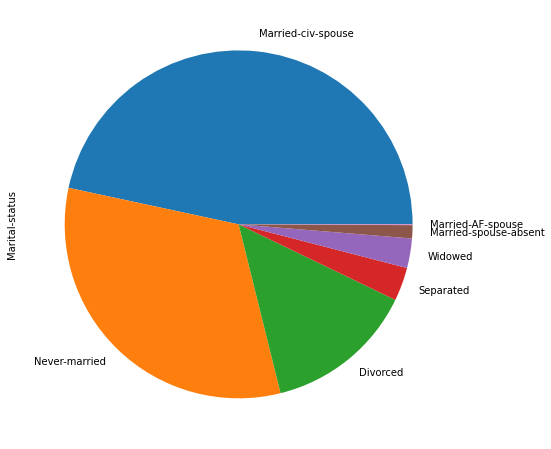

In [27]:
plt.figure(figsize=(10,8))
data['Marital-status'].value_counts().plot(kind = 'pie')
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Adm-clerical'),
  Text(1, 0, 'Exec-managerial'),
  Text(2, 0, 'Handlers-cleaners'),
  Text(3, 0, 'Prof-specialty'),
  Text(4, 0, 'Other-service'),
  Text(5, 0, 'Sales'),
  Text(6, 0, 'Transport-moving'),
  Text(7, 0, 'Farming-fishing'),
  Text(8, 0, 'Machine-op-inspct'),
  Text(9, 0, 'Tech-support'),
  Text(10, 0, 'Craft-repair'),
  Text(11, 0, 'Protective-serv'),
  Text(12, 0, 'Armed-Forces'),
  Text(13, 0, 'Priv-house-serv')])

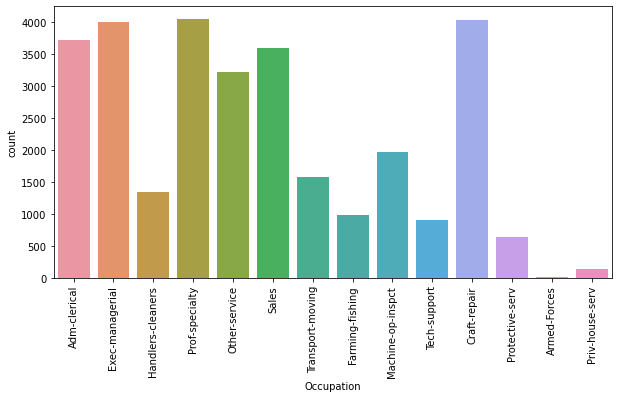

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(data['Occupation'])
plt.xticks(rotation=90)

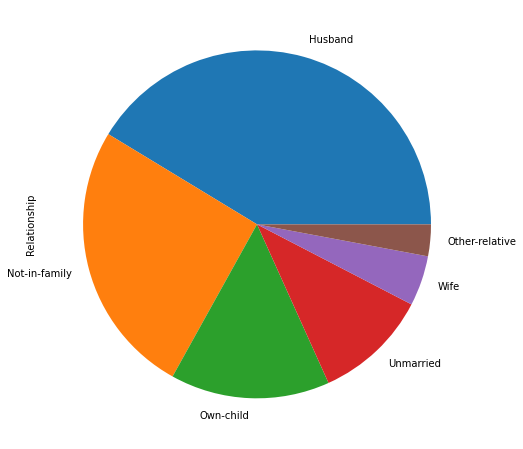

In [29]:
plt.figure(figsize=(10,8))
data['Relationship'].value_counts().plot(kind = 'pie')
plt.show()

<AxesSubplot:xlabel='Race', ylabel='count'>

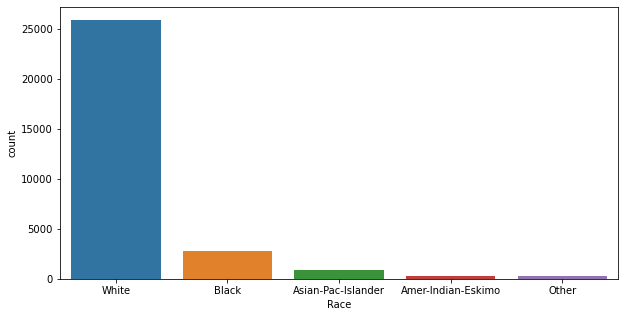

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(data['Race'])

<AxesSubplot:xlabel='Sex', ylabel='count'>

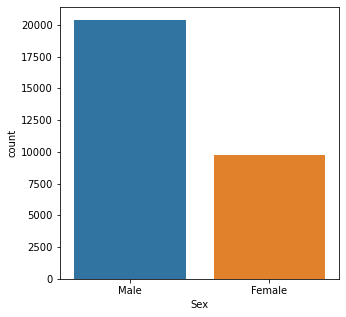

In [31]:
plt.figure(figsize=(5,5))
sns.countplot(data['Sex'])

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

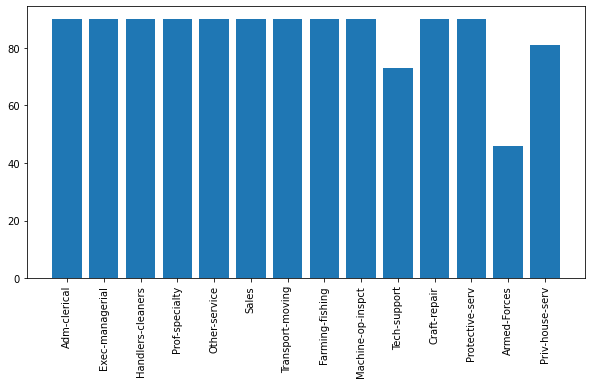

In [32]:
plt.figure(figsize=(10,5))
plt.bar("Occupation","Age",data=data)
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Top 10 Countries Wise Count \n')

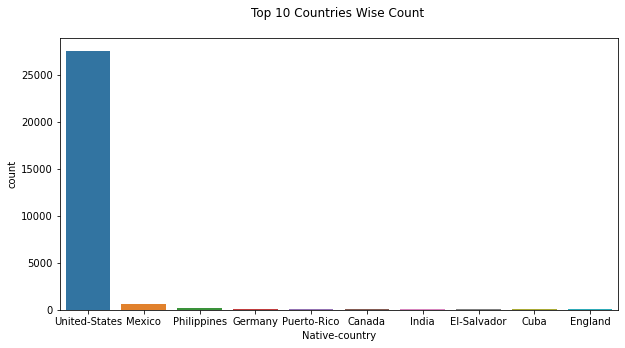

In [33]:
plt.figure(figsize=(10,5))
sns.countplot(data['Native-country'],order = data['Native-country'].value_counts().nlargest(10).index)
plt.title('Top 10 Countries Wise Count \n')

(array([  511.,  1877.,  1995., 16582.,  3004.,  3736.,  1721.,   421.,
          184.,   131.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

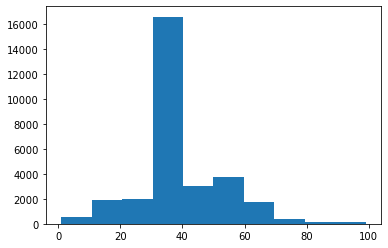

In [34]:
plt.hist('Hours-per-week',data=data)

<AxesSubplot:xlabel='Salary', ylabel='count'>

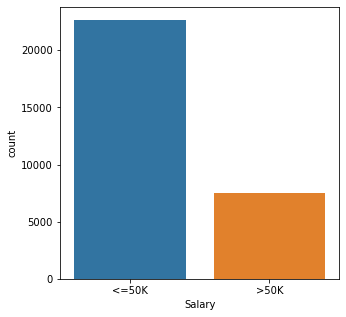

In [35]:
plt.figure(figsize=(5,5))
sns.countplot(data['Salary'])

# <u>PreProcessing</u>

In [36]:
data.isna().sum()

Age               0
Workclass         0
Education         0
Marital-status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Hours-per-week    0
Native-country    0
Salary            0
dtype: int64

**The dataset has no  null values**

## <u> Outlier Handling</u>

In [37]:
data.iloc[:,(np.where(data.dtypes == np.int64))[0]].columns

Index(['Age', 'Hours-per-week'], dtype='object')

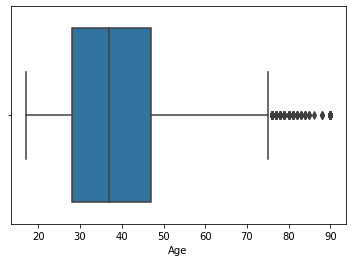

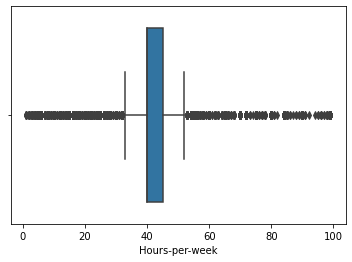

In [38]:
for i in ['Age', 'Hours-per-week']:
    sns.boxplot(x=data[i])
    plt.show()

**Age**

In [39]:
Q1=np.percentile(data['Age'],25,interpolation='midpoint')
Q3=np.percentile(data['Age'],75,interpolation='midpoint')
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
outlier=[]
for x in data['Age']:
    if x>upper_limit or x<lower_limit:
        outlier.append(x)
outlier

[79,
 76,
 90,
 77,
 76,
 81,
 78,
 90,
 88,
 90,
 77,
 90,
 77,
 78,
 80,
 90,
 81,
 81,
 76,
 80,
 90,
 76,
 79,
 76,
 81,
 76,
 90,
 90,
 80,
 90,
 90,
 79,
 78,
 79,
 84,
 90,
 77,
 80,
 77,
 90,
 81,
 83,
 84,
 79,
 76,
 85,
 82,
 79,
 77,
 90,
 76,
 90,
 84,
 78,
 78,
 76,
 80,
 90,
 90,
 77,
 76,
 84,
 76,
 90,
 76,
 90,
 76,
 77,
 90,
 77,
 78,
 77,
 81,
 78,
 82,
 81,
 77,
 76,
 80,
 90,
 80,
 84,
 82,
 78,
 79,
 76,
 90,
 84,
 90,
 83,
 78,
 80,
 77,
 78,
 76,
 79,
 80,
 79,
 80,
 90,
 90,
 90,
 81,
 76,
 83,
 90,
 90,
 81,
 80,
 80,
 90,
 79,
 77,
 77,
 80,
 76,
 82,
 85,
 80,
 79,
 90,
 76,
 76,
 77,
 76,
 79,
 81,
 77,
 88,
 90,
 82,
 76,
 88,
 76,
 77,
 83,
 76,
 77,
 79,
 77,
 86,
 90,
 77,
 82,
 83,
 81,
 76,
 79,
 76,
 84,
 78,
 76,
 76,
 76,
 78,
 84,
 79,
 78,
 90,
 80,
 81,
 78,
 81,
 90,
 80,
 82,
 90,
 90,
 85]

In [40]:
ind=data["Age"]>upper_limit
i=data.loc[ind].index
data.drop(i,inplace=True)

Text(0.5, 1.0, 'Age')

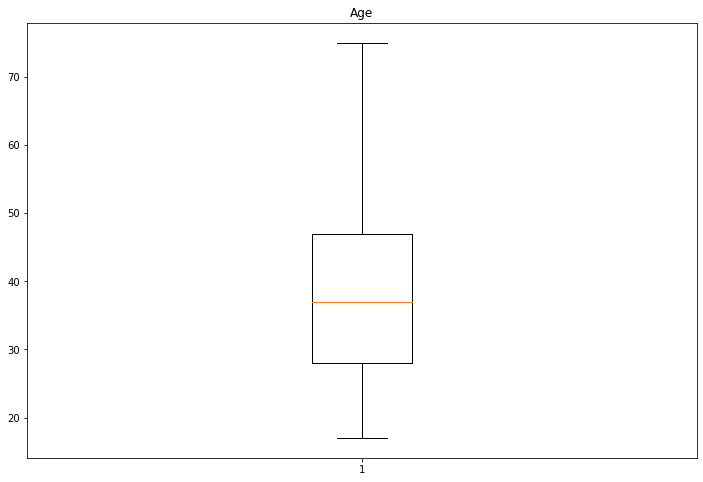

In [41]:
plt.figure(figsize=(12,8))
plt.boxplot(data['Age'])
plt.title("Age")

**Hours-per-week**

In [42]:
Q1=np.percentile(data['Hours-per-week'],25,interpolation='midpoint')
Q3=np.percentile(data['Hours-per-week'],75,interpolation='midpoint')
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
outlier=[]
for x in data['Hours-per-week']:
    if x>upper_limit or x<lower_limit:
        outlier.append(x)
outlier

[13,
 16,
 80,
 30,
 60,
 20,
 80,
 15,
 25,
 60,
 55,
 60,
 58,
 32,
 70,
 22,
 30,
 25,
 60,
 60,
 25,
 56,
 60,
 28,
 60,
 60,
 20,
 30,
 30,
 24,
 24,
 2,
 60,
 16,
 20,
 25,
 12,
 65,
 1,
 28,
 24,
 55,
 60,
 12,
 60,
 55,
 20,
 20,
 55,
 70,
 20,
 60,
 30,
 20,
 30,
 60,
 12,
 75,
 24,
 98,
 15,
 60,
 56,
 16,
 60,
 80,
 25,
 54,
 15,
 24,
 55,
 60,
 30,
 20,
 25,
 25,
 30,
 24,
 55,
 15,
 15,
 10,
 10,
 30,
 25,
 6,
 16,
 55,
 64,
 65,
 25,
 24,
 60,
 19,
 30,
 18,
 60,
 72,
 25,
 60,
 28,
 55,
 60,
 20,
 60,
 16,
 60,
 24,
 6,
 30,
 20,
 20,
 20,
 60,
 60,
 25,
 20,
 8,
 20,
 80,
 58,
 9,
 30,
 8,
 32,
 55,
 60,
 12,
 70,
 24,
 60,
 80,
 28,
 21,
 60,
 20,
 60,
 32,
 55,
 20,
 20,
 24,
 55,
 60,
 64,
 26,
 60,
 60,
 14,
 60,
 60,
 55,
 15,
 20,
 32,
 60,
 25,
 10,
 16,
 5,
 55,
 30,
 20,
 20,
 60,
 20,
 30,
 65,
 25,
 15,
 60,
 20,
 24,
 15,
 20,
 25,
 72,
 20,
 20,
 18,
 70,
 55,
 30,
 32,
 55,
 24,
 56,
 60,
 55,
 30,
 60,
 20,
 30,
 20,
 20,
 30,
 20,
 75,
 60,
 60,
 24,
 25

In [43]:
ind=data["Hours-per-week"]>upper_limit
i=data.loc[ind].index
data.drop(i,inplace=True)

Text(0.5, 1.0, 'Hours-per-week')

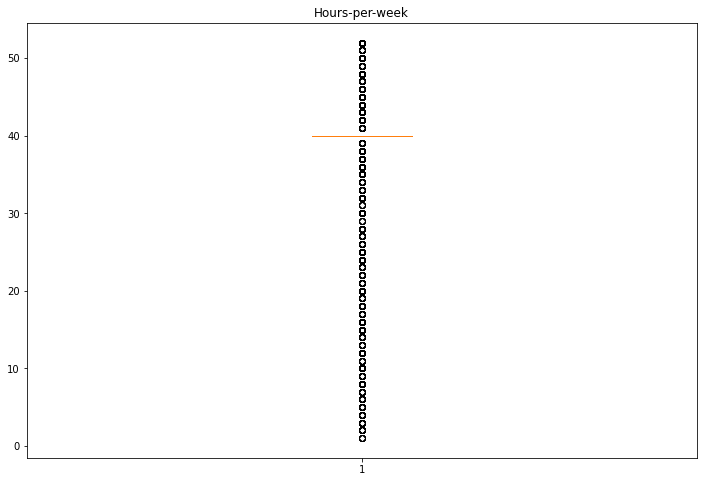

In [44]:
plt.figure(figsize=(12,8))
plt.boxplot(data['Hours-per-week'])
plt.title('Hours-per-week')

In [45]:
data.shape

(26674, 11)

***
**After removing the outliers, removing the insignificant columns and rows containing special Character the shape of the dataset has been changed from (32561, 14) to (26674, 11)**
***

***
## <u>Encoding</u>

In [46]:
cat=data.describe(include=['object']) 
cat

,Workclass,Education,Marital-status,Occupation,Relationship,Race,Sex,Native-country,Salary
count,26674,26674,26674,26674,26674,26674,26674,26674,26674
unique,7,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,20203,8865,11855,3652,10340,22746,17441,24287,20592


**From the above table we can analyse that the columns with 2 uique values(Sex and Salary) needs Label Encoding and all other columns needs One hot Encoding as they have more than 2 unique values**

<u>**Label Encoding**</u>

In [47]:
cat_1=['Sex','Salary']

In [48]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
data[cat_1] = data[cat_1].apply(label_en.fit_transform)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26674 entries, 0 to 30161
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             26674 non-null  int64 
 1   Workclass       26674 non-null  object
 2   Education       26674 non-null  object
 3   Marital-status  26674 non-null  object
 4   Occupation      26674 non-null  object
 5   Relationship    26674 non-null  object
 6   Race            26674 non-null  object
 7   Sex             26674 non-null  int32 
 8   Hours-per-week  26674 non-null  int64 
 9   Native-country  26674 non-null  object
 10  Salary          26674 non-null  int32 
dtypes: int32(2), int64(2), object(7)
memory usage: 2.2+ MB


<u>**One-Hot Encoding**<u/>

In [49]:
cat_2=['Workclass','Education','Marital-status','Occupation','Relationship','Race','Native-country']

In [50]:
data_encoded1=pd.get_dummies(data,columns=cat_2) 
data_encoded1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26674 entries, 0 to 30161
Data columns (total 100 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Age                                        26674 non-null  int64
 1   Sex                                        26674 non-null  int32
 2   Hours-per-week                             26674 non-null  int64
 3   Salary                                     26674 non-null  int32
 4   Workclass_Federal-gov                      26674 non-null  uint8
 5   Workclass_Local-gov                        26674 non-null  uint8
 6   Workclass_Private                          26674 non-null  uint8
 7   Workclass_Self-emp-inc                     26674 non-null  uint8
 8   Workclass_Self-emp-not-inc                 26674 non-null  uint8
 9   Workclass_State-gov                        26674 non-null  uint8
 10  Workclass_Without-pay                      26

In [51]:
data_encoded1.head()

,Age,Sex,Hours-per-week,Salary,Workclass_Federal-gov,Workclass_Local-gov,Workclass_Private,Workclass_Self-emp-inc,Workclass_Self-emp-not-inc,Workclass_State-gov,...,Native-country_Portugal,Native-country_Puerto-Rico,Native-country_Scotland,Native-country_South,Native-country_Taiwan,Native-country_Thailand,Native-country_Trinadad&Tobago,Native-country_United-States,Native-country_Vietnam,Native-country_Yugoslavia
0,39,1,40,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,50,1,13,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,38,1,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,1,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,0,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### <u>Scaling</u>

In [52]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()# define standard scaler
X=data_encoded1.drop(['Salary'],axis=1)
y=data_encoded1['Salary']

In [53]:
data_encoded1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26674 entries, 0 to 30161
Data columns (total 100 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Age                                        26674 non-null  int64
 1   Sex                                        26674 non-null  int32
 2   Hours-per-week                             26674 non-null  int64
 3   Salary                                     26674 non-null  int32
 4   Workclass_Federal-gov                      26674 non-null  uint8
 5   Workclass_Local-gov                        26674 non-null  uint8
 6   Workclass_Private                          26674 non-null  uint8
 7   Workclass_Self-emp-inc                     26674 non-null  uint8
 8   Workclass_Self-emp-not-inc                 26674 non-null  uint8
 9   Workclass_State-gov                        26674 non-null  uint8
 10  Workclass_Without-pay                      26

In [54]:
data_encoded1.head()

,Age,Sex,Hours-per-week,Salary,Workclass_Federal-gov,Workclass_Local-gov,Workclass_Private,Workclass_Self-emp-inc,Workclass_Self-emp-not-inc,Workclass_State-gov,...,Native-country_Portugal,Native-country_Puerto-Rico,Native-country_Scotland,Native-country_South,Native-country_Taiwan,Native-country_Thailand,Native-country_Trinadad&Tobago,Native-country_United-States,Native-country_Vietnam,Native-country_Yugoslavia
0,39,1,40,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,50,1,13,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,38,1,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,1,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,0,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# <u>Modeling</u>

In [55]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.20, random_state=42)

In [56]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (21339, 99)
Training Labels Shape: (21339,)
Testing Features Shape: (5335, 99)
Testing Labels Shape: (5335,)


###  1.Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(X_train,y_train)
prediction1=log_model.predict(X_test)

In [58]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,prediction1))
print('R2 Value:',metrics.r2_score(y_test,prediction1))

MSE 0.15370196813495782
R2 Value: 0.1152130288405726


In [59]:
m1=mean_squared_error(y_test,prediction1)
r1=metrics.r2_score(y_test,prediction1)
performance1=pd.DataFrame([m1,r1])
performance1.columns=['Logistic Regression'] 

### 2.Random Forest

In [60]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
model2=regressor.fit(X_train,y_train) 
prediction2=model2.predict(X_test)

In [61]:
print("MSE",mean_squared_error(y_test,prediction2))
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_test,prediction2))

MSE 0.12188080797301841
R2 Value: 0.2983918668222697


In [62]:
m2=mean_squared_error(y_test,prediction2)
r_2=metrics.r2_score(y_test,prediction2)
performance2=pd.DataFrame([m2,r_2])
performance2.columns=['Random Forest Regressor'] 

### 3.K-NN

In [63]:
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=400)
KNN=RegModel.fit(X_train,y_train)
prediction3=KNN.predict(X_test)

In [64]:
print("MSE",mean_squared_error(y_test,prediction3))
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_test,prediction3))

MSE 0.13388396321462043
R2 Value: 0.2292955793807948


In [65]:
m3=mean_squared_error(y_test,prediction3)
r3=metrics.r2_score(y_test,prediction3)
performance3=pd.DataFrame([m3,r3])
performance3.columns=['K-NN'] 

### 4.Decision Tree Regressor

In [66]:
from sklearn.tree import DecisionTreeRegressor 
dtr = DecisionTreeRegressor(random_state =42) 
dtr_model=dtr.fit(X_train,y_train)
prediction4=dtr_model.predict(X_test)

In [67]:
print("MSE",mean_squared_error(y_test,prediction4))
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_test,prediction4))

MSE 0.18532833327288703
R2 Value: -0.06684446956829881


In [68]:
m4=mean_squared_error(y_test,prediction4)
r4=metrics.r2_score(y_test,prediction4)
performance4=pd.DataFrame([m4,r4])
performance4.columns=['Decision Tree Regressor']

### 5.SVM Regressor

In [69]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(X_test,y_test)
prediction5 = svm.predict(X_test)

In [70]:
print("MSE ",mean_squared_error(y_test,prediction5))
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_test,prediction5))

MSE  0.14601686972820993
R2 Value: 0.159452377398544


In [71]:
m5=mean_squared_error(y_test,prediction5)
r5=metrics.r2_score(y_test,prediction5)
performance5=pd.DataFrame([m5,r5])
performance5.columns=['SVM Regressor']

### 6.Lasso Regression

In [72]:
from sklearn import linear_model
las=linear_model.Lasso(alpha=0.1)
lasso_model=las.fit(X_train,y_train)
prediction6=lasso_model.predict(X_test)

In [73]:
print("MSE",mean_squared_error(y_test,prediction6))
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_test,prediction6))

MSE 0.1552615255553365
R2 Value: 0.10623542040087797


In [74]:
m6=mean_squared_error(y_test,prediction6)
r6=metrics.r2_score(y_test,prediction6)
performance6=pd.DataFrame([m6,r6])
performance6.columns=['Lasso Regresiion']

<u>**Performance Comparison of ML Models**</u>

In [75]:
performance_comparison=pd.concat([performance1,performance2,performance3,performance4,performance5,performance6],axis=1)
performance_comparison['Performance Metrics']=['MSE Value','R^2 Value']
performance_comparison=performance_comparison.set_index('Performance Metrics')
performance_comparison

,Logistic Regression,Random Forest Regressor,K-NN,Decision Tree Regressor,SVM Regressor,Lasso Regresiion
Performance Metrics,,,,,,
MSE Value,0.153702,0.121881,0.133884,0.185328,0.146017,0.155262
R^2 Value,0.115213,0.298392,0.229296,-0.066844,0.159452,0.106235


 **The model with low value of MSE and high value of R2 Value can be considerd to be a best model for predicting the Salary. Hence from the above set of results, we can analyze that Random forest regressor is the best fit model** 

In [76]:
regressor = RandomForestRegressor()
model_rf=regressor.fit(X_train,y_train) 
predictions=model_rf.predict(X_test)

In [77]:
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.21


In [78]:
all_features=round(np.mean(errors), 2)

In [79]:
import sklearn
import math
mse = sklearn.metrics.mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)
accuracy = 100*max(0,rmse)
print('Accuracy for Random Forest',round(accuracy, 2), '%.') 

Accuracy for Random Forest 35.0 %.


## <u>Web Hosting</u>